In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('E:/vscode project/DataAnalysis/gold_scrapy/gold/data/2008.811-2025.519.csv')


In [9]:
print(data['hy'].value_counts())
Au9999 = data[data['hy'].isin(['Au9999', 'Au99.99'])]


hy
Au100g      3668
Ag(T+D)     3617
Au(T+D)     3360
Au(T+N1)    2502
Au(T+N2)    2470
            ... 
Au（T+N1）       1
Au（T+D）        1
Variety        1
Ag(            1
N              1
Name: count, Length: 72, dtype: int64


In [12]:
Au9999['hy'] = Au9999['hy'].replace({'Au9999': 'Au99.99'})

C:\Users\lcccccccccy\AppData\Local\Temp\ipykernel_2024\4101097958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Au9999['hy'] = Au9999['hy'].replace({'Au9999': 'Au99.99'})


In [ ]:
Au9999.to_csv('Au9999.csv', index=False)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('Au9999.csv')
df['date'] = pd.to_datetime(df['date'])
df['kpj'] = pd.to_numeric(df['kpj'], errors='coerce')
df['zgj'] = pd.to_numeric(df['zgj'], errors='coerce')
df['zdj'] = pd.to_numeric(df['zdj'], errors='coerce')
df['spj'] = pd.to_numeric(df['spj'], errors='coerce')
df['zd'] = pd.to_numeric(df['zd'], errors='coerce')


In [4]:
%matplotlib inline

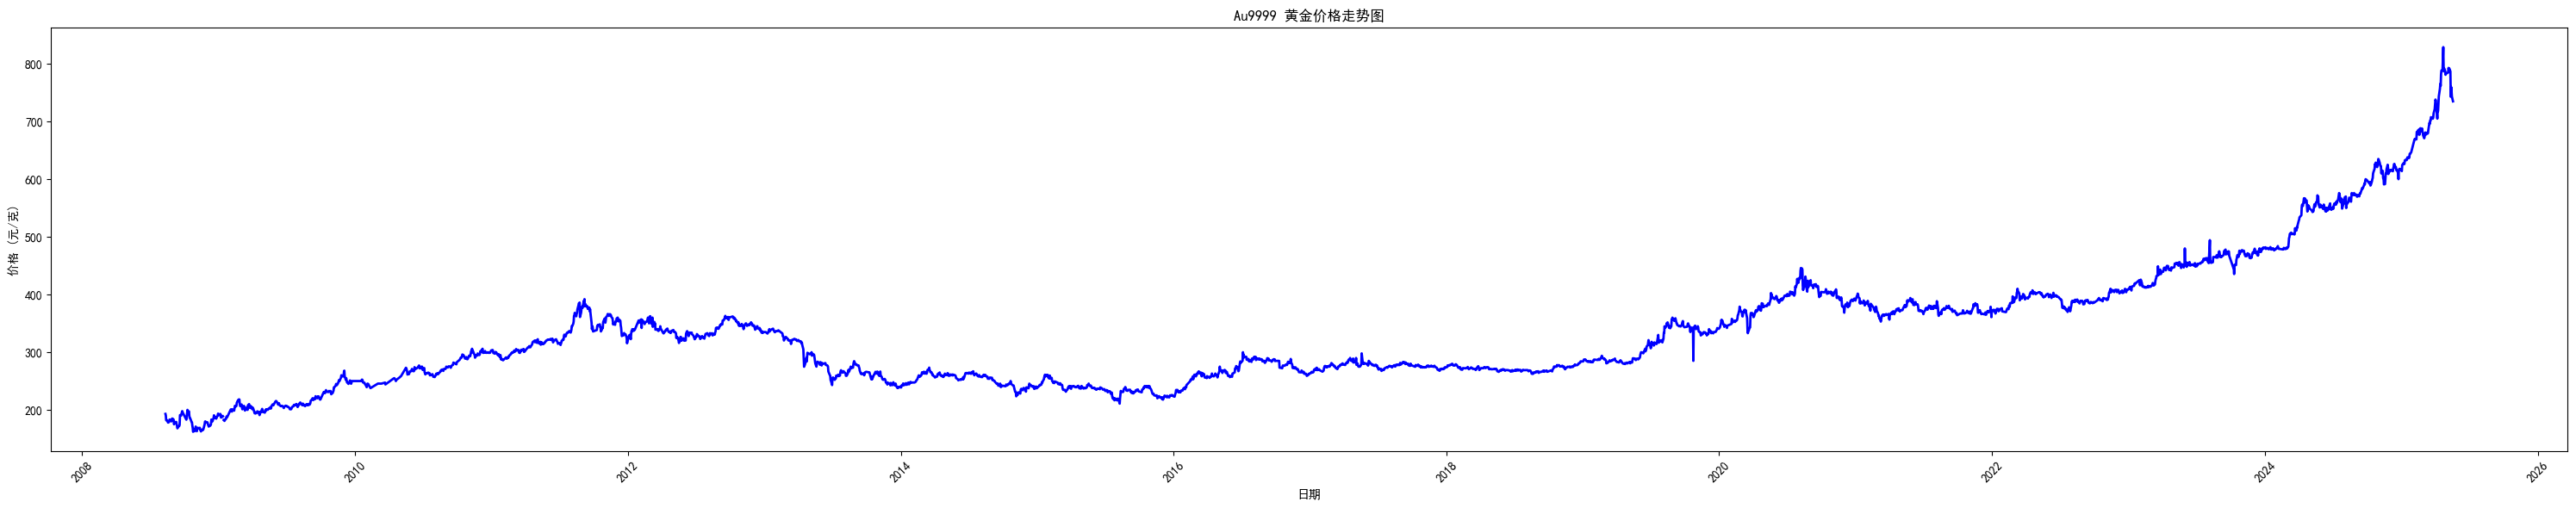

In [ ]:
# 使用matplotlib绘制静态不可交互图形
plt.figure(figsize=(30, 6))
plt.plot(df['date'], df['kpj'], label='开盘价', color='blue', linewidth=2, linestyle='-')
plt.title('Au9999 黄金开盘价走势图')
plt.xlabel('日期')
plt.ylabel('价格 (元/克)')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('Au9999价格走势图.png')
plt.show()
# 不可交互图像 为了优化显示 图像宽被拉大

In [ ]:
# 使用plotly绘制交互式图形 只有开盘价的单线
import plotly.express as px
fig = px.line(df, x='date', y='kpj', title='Au9999 黄金开盘价走势图',
              labels={'date': '日期', 'kpj': '价格 (元/克)'},
              template='plotly_white')
fig.update_layout(
    xaxis_title='日期',
    yaxis_title='价格 (元/克)',
    xaxis_tickformat='%Y-%m-%d',
    width=1200,  # 设置图形宽度
    height=600   # 设置图形高度
)
fig.show()
# 保存交互式图形为HTML文件
fig.write_html('Au9999开盘价走势图.html')

In [8]:
# 使用plotly绘制交互式图形 多线图
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['kpj'], name='开盘价', visible=True)) #visible=True表示初始显示
fig.add_trace(go.Scatter(x=df['date'], y=df['zgj'], name='最高价', visible=False))
fig.add_trace(go.Scatter(x=df['date'], y=df['zdj'], name='最低价', visible=False))
fig.add_trace(go.Scatter(x=df['date'], y=df['spj'], name='收盘价', visible=False))
fig.add_trace(go.Scatter(x=df['date'], y=df['zd'], name='涨跌', visible=False))

fig.update_layout(
    updatemenus=[
        # 下拉菜单设置
        dict(
            type='dropdown',
            direction='right',
            buttons=list([
                dict(label='开盘价', 
                     method='update', 
                     args=[{'visible': [True, False, False, False, False]},
                           {'title': 'Au9999 黄金开盘价走势图'},
                           ]),
                dict(label='最高价', 
                     method='update', 
                     args=[{'visible': [False, True, False, False, False]},
                           {'title': 'Au9999 黄金最高价走势图'},
                           ]),
                dict(label='最低价',
                     method='update',
                     args=[{'visible': [False, False, True, False, False]},
                           {'title': 'Au9999 黄金最低价走势图'},
                           ]),
                dict(label='收盘价',
                     method='update',
                     args=[{'visible': [False, False, False, True, False]},
                           {'title': 'Au9999 黄金收盘价走势图'},
                           ]),
                dict(label='涨跌',
                     method='update',
                     args=[{'visible': [False, False, False, False, True]},
                           {'title': 'Au9999 黄金涨跌走势图'},
                           ]),
            ]),
            x=0.5,
            xanchor='center',
            y=1.2,
            yanchor='top',
        ),
    ],
    # x轴时间滑块设置
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    showlegend=False,
    xaxis_title='日期',
    yaxis_title='价格'
)
fig.write_html('Au9999黄金价格走势图.html', include_plotlyjs='cdn')
fig.show()